# 문제정의: 환자 정보를 사용하여 심장 질환 유무(정상 :0, 심장 질환 진단: 1)를 분류하는 이중 분류 문제로 정의


##데이터 다운로드 : https://archive.ics.uci.edu/ml/datasets/heart+disease


## 라이브러리 임포트

In [1]:
# Libraries for reading and handling the data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries FOR creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Libraries for Analysing the ML model
from sklearn import metrics

## 데이터 준비하기

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# null 값 확인
df.isnull().sum() # null 있니? 그럼 그 합친 값이 무엇이니

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## 데이터 전처리

In [5]:
# 숫자 형태의 변수 -> 카테고리 형태의 변경
# 컬럼 안에 있는 숫자들을 카테고리 형으로 바꾸는 과정
categorical_var=['sex','cp','fbs','restecg','exng','slp','caa','thall']
df[categorical_var] = df[categorical_var].astype('category')

In [6]:
df.info()
# ↓ category형으로 바뀐 것을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


# 데이터 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



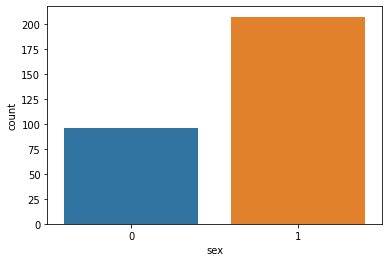

In [7]:
# 성별에 따른 환자의 수 (0: 여성, 1: 남성)
sns.countplot(df.sex) 

# ↓ 남자 환자의 수가 더 많다

In [8]:
df.groupby('cp').sum().reset_index()[['cp', 'output']]
# cp로 groupby하고 sum 더한 후, cp랑 output를 인덱스로 묶어서 확인해보기 

,cp,output
0,0,39
1,1,41
2,2,69
3,3,16


In [9]:
# 슴 통증 타입 별 환자 수 (cp: chest pain type) (4가지 타입) 
px.bar(df.groupby('cp').sum().reset_index()[['cp', 'output']],
       x= 'cp', y='output', color = 'cp',
       title='Count Plot of Heart Disease with Respect to Chest Pain') # cp로 groupby 짓기

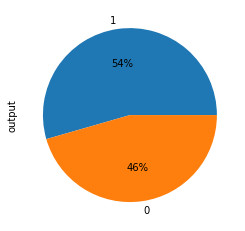

In [10]:
# 정상 - 심장병 환자 비율 (0: 정상, 1: 심장병)
df.output.value_counts().plot.pie(autopct= '%1.f%%')

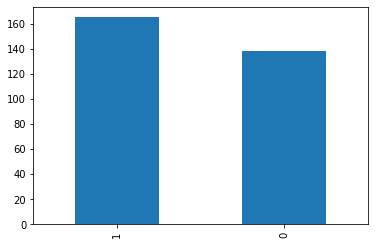

In [11]:
df.output.value_counts().plot.bar()

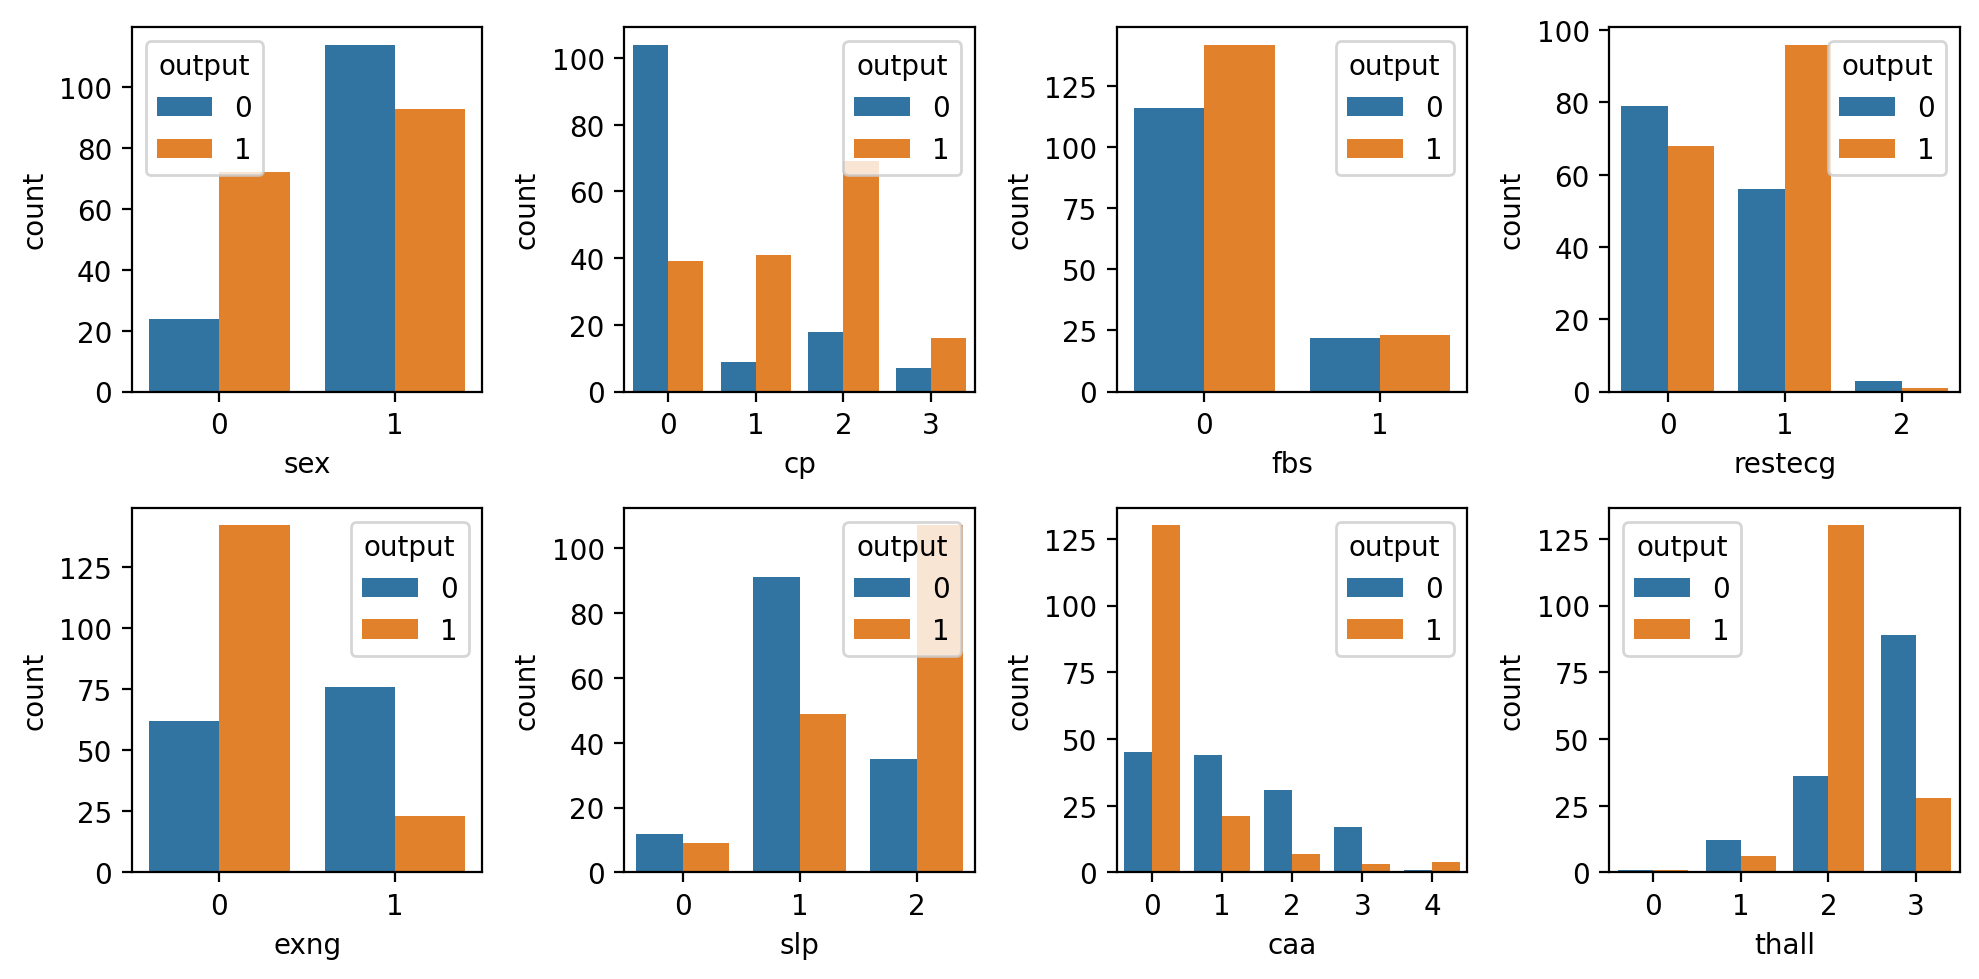

In [12]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인

fig, ax = plt.subplots(2, 4, figsize=(10, 5), dpi = 200)

for axis, cat_var in zip(ax.ravel(), categorical_var) :
  sns.countplot(x=cat_var, data=df, hue='output', ax=axis)

plt.tight_layout()

# 2줄에 4개씩 그려라

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


In [14]:
# 수치형으로 되어 있는 컬럼 -> 이상치
numeric_var = [i for i in df.columns if i not in categorical_var][:-1]

In [15]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

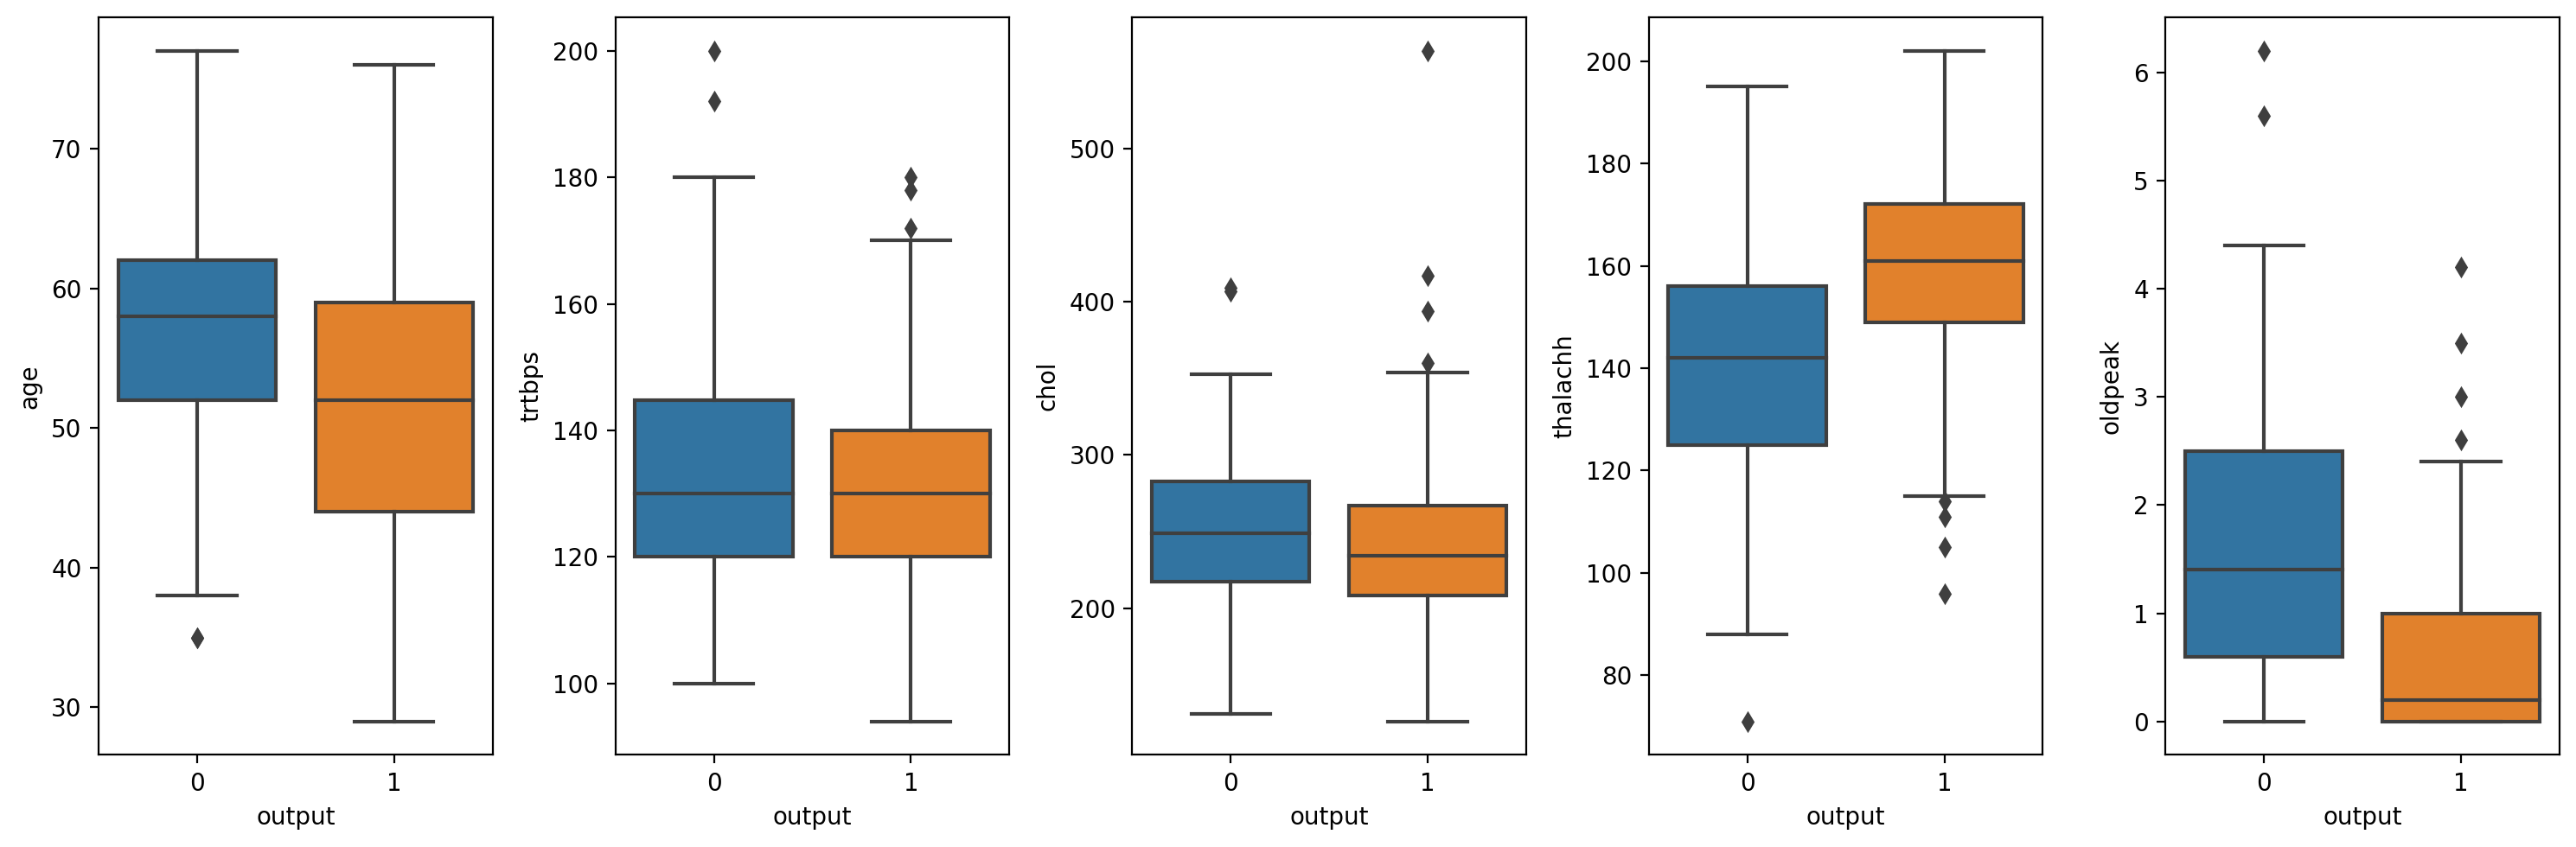

In [16]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
# boxplot 그리기

fig, ax = plt.subplots(1, 5, figsize=(15, 5), dpi = 200)

for axis, num_var in zip(ax.ravel(), numeric_var) :
  sns.boxplot(y=num_var, data=df, x='output', ax=axis)

plt.tight_layout()

# 1줄에 5개 그려라

이상치 제거<br>
상위 95%에 위치하고 있는 데이터셋만 삭제

In [17]:
# 이상치 삭제 trtbps, chol, thalachh, oldpeak
# ↑ 위 그래프에서 age이외 2,3,4,5 그래프에서 이상치 심한 것을 확인하였음
# 그래서 age제외 다른 항목들에서 이상치 제거

# 상위 5%에 삭제하고 상위 95%만 남기기
df = df[df['trtbps'] < df['trtbps'].quantile(0.95)]
df = df[df['chol'] < df['chol'].quantile(0.95)]
df = df[df['oldpeak'] < df['oldpeak'].quantile(0.95)]
# ↑ 상위 95%보다 작은 경우 다시 df에 담는 과정

In [18]:
# thalachh의 하위 5% 제거  
df = df[df['thalachh'] > df['thalachh'].quantile(0.05)]

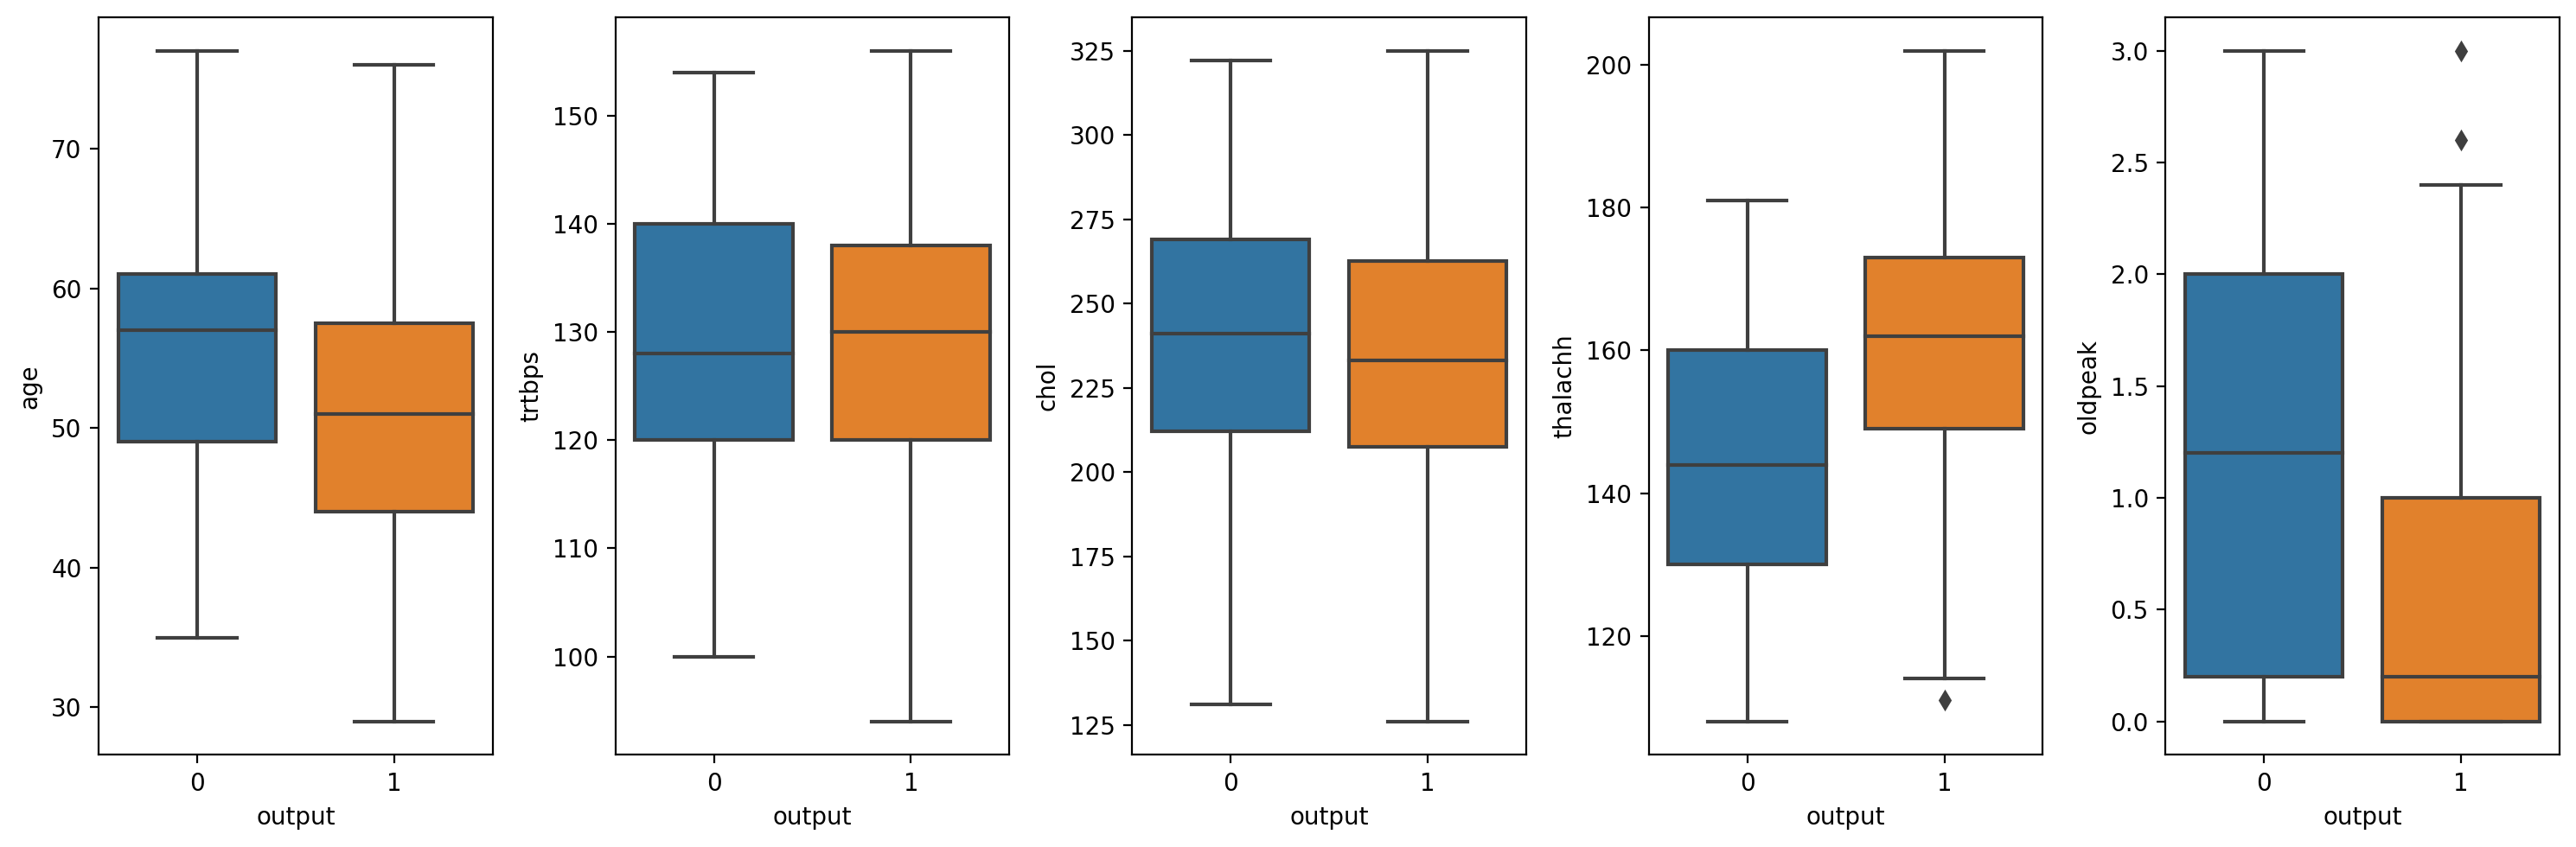

In [19]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
# boxplot 그리기

fig, ax = plt.subplots(1, 5, figsize=(15, 5), dpi = 200)

for axis, num_var in zip(ax.ravel(), numeric_var) :
  sns.boxplot(y=num_var, data=df, x='output', ax=axis)

plt.tight_layout()

# 1줄에 5개 그려라

# 데이터 분리하기

In [20]:
# X(시험지), y(정답) 분리하기
X = df.iloc[:, :-1]
y = df['output']

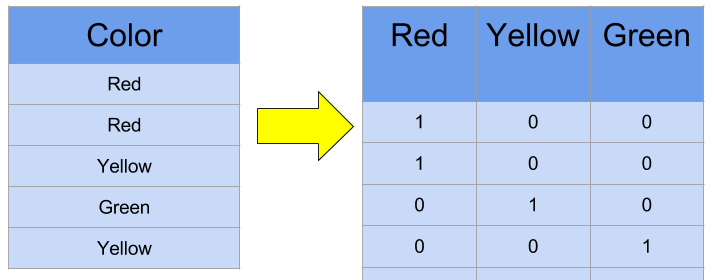

In [21]:
# 원-핫 인코딩 처리
# 컬럼 -> 원-핫 인코딩 처리
temp = pd.get_dummies(X[categorical_var], drop_first=True)

In [22]:
# 기존 데이터랑 합치기
X_modified = pd.concat([X, temp], axis = 1)
X_modified

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1


In [23]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var, axis=1, inplace=True)


In [24]:
X_modified.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


#훈련용, 테스트 데이터 분리하기

In [25]:
# train : test = 8:2
X_train, X_test, y_train, y_test = train_test_split(X_modified, y,
                                                    train_size = 0.8, # test size 기준이었으면 0.2를 줬어야 함
                                                    random_state=7)


# 자원 축소 -> 스케일링

In [26]:
# 수치형 데이터 정규화
scaler = StandardScaler()
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [27]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
108,-0.346207,-0.580289,0.158954,0.448927,0.325619,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
12,-0.451867,0.141712,0.688289,0.897853,-0.239108,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
22,-1.191491,0.863712,-0.274138,1.247019,-0.916779,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
218,1.238701,0.502712,0.399561,-1.296899,2.245689,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
166,1.450022,-0.580289,-0.201956,-1.197138,2.019798,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1


#머신러닝 모델 구축 - 1) LogisticRegression

In [28]:
log_reg = LogisticRegression().fit(X_train, y_train)

## 정확도 확인

In [29]:
print('Train data Score: ', log_reg.score(X_train, y_train))
print('Test data Score: ', log_reg.score(X_test, y_test))

Train data Score:  0.8829787234042553
Test data Score:  0.8333333333333334


#머신러닝 모델 구축 - 2) Decision Tree

In [30]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=20,
                              min_samples_split=40).fit(X_train, y_train)

## 정확도 확인

## 정확도 확인

In [31]:
# 정확도 확인
print('Train data Score: ', tree.score(X_train, y_train))
print('Test data Score: ', tree.score(X_test, y_test))

Train data Score:  0.776595744680851
Test data Score:  0.875


# 머신러닝 모델 구축 - 3) GradientBoostingClassifier

In [32]:
boost = GradientBoostingClassifier(max_depth=3,
                                   learning_rate=0.05).fit(X_train, y_train)
                                   

In [33]:
# 정확도 확인
print('Train data Score: ', boost.score(X_train, y_train))
print('Test data Score: ', boost.score(X_test, y_test))

Train data Score:  0.9840425531914894
Test data Score:  0.8958333333333334


# 성능평가 - ROC 커브

In [34]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


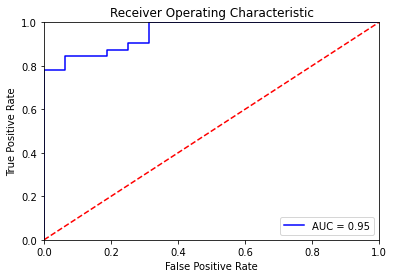

In [35]:
# Logistic Regression ROC
plot_auc_roc(log_reg)

# auc = 0.95라는 것은 좋은 모델임

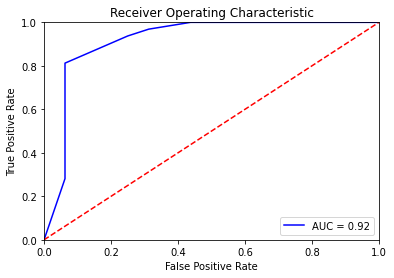

In [36]:
# Decision Tree
plot_auc_roc(tree)

# auc = 0.92라는 것은 좋은 모델임

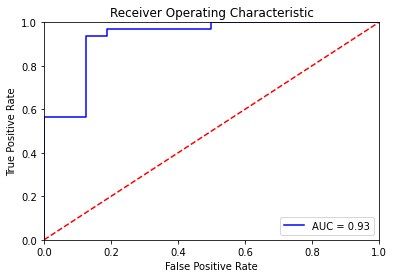

In [38]:
# GrandientBoostingClasifie
plot_auc_roc(boost)

# auc = 0.93라는 것은 좋은 모델임

# 모델 성능 평가

In [51]:
precision_list = []
recall_list = []

In [44]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression')
print(lg_report)
print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )


Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.88      0.88      0.88        32

    accuracy                           0.83        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.83      0.83      0.83        48

accuracy 0.8333333333333334
precision 0.875
recall 0.875
f1 0.875


In [49]:
# Decision Tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('Tree 평가 지표')
print(tree_report)
print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )


Tree 평가 지표
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.86      0.97      0.91        32

    accuracy                           0.88        48
   macro avg       0.89      0.83      0.85        48
weighted avg       0.88      0.88      0.87        48

accuracy 0.875
precision 0.8611111111111112
recall 0.96875
f1 0.911764705882353


In [52]:
# GrandientBoostingClasifie 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('Boost 평가 지표')
print(boost_report)
print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
print('recall', metrics.recall_score(y_test,boost_y_hat) )
print('f1', metrics.f1_score(y_test,boost_y_hat) )

# precision(정밀도): 우리가 예측한 사람 중에 실제 예측 비율이 있는 것 => 잘 맞추는 것
# recall: 실제 중에 우리 모델이 심장병으로 예측한 비율/ 높을수록 오진단(True를 False로 예측하는 경우)

# precision과 recall을 비교했을 때 recall 값이 높은 것을 선택
# precision과 recall 둘 다 중요할 경우 f1-score 비교하여 선택

Boost 평가 지표
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.89      0.97      0.93        32

    accuracy                           0.90        48
   macro avg       0.90      0.86      0.88        48
weighted avg       0.90      0.90      0.89        48

accuracy 0.8958333333333334
precision 0.8857142857142857
recall 0.96875
f1 0.9253731343283582


# Precision : 예측한 모델 중 실제 사람이 있는 비율
# Recall :실제 중 모델이 심장병이라 예측한 사람
# Recall 높을수록 오진단 (심장병인데 아니라는 진단을 낮추려면 Recall이 낮아야한다.)
# Recall을 중점으로 봐야함
# Recall이 제일 높은 모델을 선택해야 한다.
# 둘 다 중요하다면 f1 score를 확인한다.
# 정확도를 요구할 때는 Precision을 사용

취향, 추천 등을 비교할 때는 precision이 높을 것을 주로 사용하고<br>
사망 및 생명과 관련된 것은 recall이 주로 높은 것을 사용한다

In [53]:
precision_list =[]
recall_list = []

precision_list.append(metrics.precision_score(y_test,lg_y_hat))
recall_list.append(metrics.recall_score(y_test,lg_y_hat))

precision_list.append(metrics.precision_score(y_test,tree_y_hat))
recall_list.append(metrics.recall_score(y_test,tree_y_hat))

precision_list.append(metrics.precision_score(y_test,boost_y_hat))
recall_list.append(metrics.recall_score(y_test,boost_y_hat))

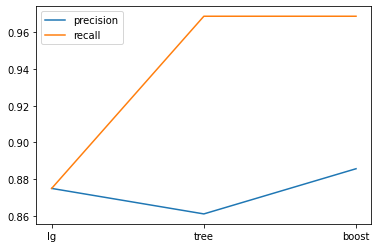

In [54]:
plt.plot(['lg','tree','boost'],precision_list, label ='precision')
plt.plot(['lg','tree','boost'],recall_list, label ='recall')
plt.legend()
plt.show()